In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gower
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
df = pd.read_csv("clustering_data_sample_final.csv")

In [ ]:
df.drop(columns="Unnamed: 0", inplace=True)

### Compute Gower Matrix to use Gower distance for k-Medoids

In [ ]:
gower_dist = gower.gower_matrix(df)
gower_dist.shape

(7218, 7218)

### Compute Silhouette scores for cluster range from 2-9 to find ideal cluster number hyperparameter

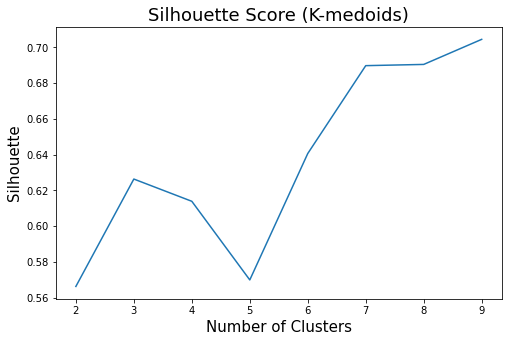

In [ ]:
silhouette_score_list =[]
for n_clusters in range(2, 10):
   
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    clusterer = KMedoids(n_clusters = n_clusters, random_state = 42, method = 'pam') 
    cls_assignment = clusterer.fit_predict(gower_dist)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(gower_dist, cls_assignment)
    silhouette_score_list.append(silhouette_avg)

plt.subplots(figsize=(8,5))
plt.plot(range(2, 10), silhouette_score_list)
plt.title('Silhouette Score (K-medoids)', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Silhouette', fontsize=15)
plt.show()

### Run k-Medoids with 3 clusters and append cluster assignment to original (non-scaled) data

In [ ]:
new_num_clusters = 3

clusterer = KMedoids(n_clusters = new_num_clusters, random_state = 42, method = 'pam') 
cls_assignment = clusterer.fit_predict(gower_dist)

In [ ]:
orig_df = pd.read_csv("original_data_sample.csv")

In [ ]:
orig_df['cluster'] = cls_assignment

In [ ]:
orig_df.head()

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt,cluster
0,M,43.0,2,Coach,Outside Booking,Nonmember,683.0000,2
1,F,22.0,5,Coach,Outside Booking,Nonmember,315.9080,2
2,F,38.0,8,Coach,Outside Booking,Standard,278.2325,0
3,M,70.0,2,Coach,SCA Website Booking,Standard,181.3900,0
4,F,44.0,1,Coach,Outside Booking,Nonmember,248.3700,2


In [ ]:
orig_df.groupby('cluster').agg({"GenderCode":pd.Series.mode, "Age":"mean", "TicketNum":"mean", "BkdClassOfService":pd.Series.mode, "BookingChannel":pd.Series.mode, "UflyMemberStatus":pd.Series.mode, "BaseFareAmt":"mean"})

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
cluster,,,,,,,
0,M,45.404237,3.324576,Coach,SCA Website Booking,Standard,290.025093
1,F,39.542869,2.211748,Coach,SCA Website Booking,Nonmember,259.082683
2,F,38.325014,2.141158,Coach,Outside Booking,Nonmember,273.028351


### Decision Tree for cluster 0

In [ ]:
X = orig_df.drop(columns='cluster')

In [ ]:
y = orig_df.cluster.copy()
y.loc[y == 2] = 1

In [ ]:
dmy = pd.get_dummies(X[['GenderCode', 'BkdClassOfService', 'BookingChannel', 'UflyMemberStatus']])

In [ ]:
dmy.drop(columns=['GenderCode_F','BkdClassOfService_Coach'], inplace=True)

In [ ]:
dmy

,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard
0,1,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7213,1,0,0,0,0,0,0,1,0,1,0
7214,1,0,0,0,0,1,0,0,0,1,0
7215,1,0,0,1,0,0,0,0,0,1,0
7216,1,0,0,0,0,1,0,0,0,1,0


In [ ]:
X = pd.concat([X.select_dtypes('number'), dmy], axis=1)
X.head()

,Age,TicketNum,BaseFareAmt,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard
0,43.0,2,683.0000,1,0,0,1,0,0,0,0,0,1,0
1,22.0,5,315.9080,0,0,0,1,0,0,0,0,0,1,0
2,38.0,8,278.2325,0,0,0,1,0,0,0,0,0,0,1
3,70.0,2,181.3900,1,0,0,0,0,1,0,0,0,0,1
4,44.0,1,248.3700,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

## Cluster 0 = Sun Country Members who aren't outside booking

[Text(0.39285714285714285, 0.9, 'UflyMemberStatus_Nonmember <= 0.5\ngini = 0.274\nsamples = 7218\nvalue = [1180, 6038]\nclass = y[1]'),
 Text(0.14285714285714285, 0.7, 'BookingChannel_Outside Booking <= 0.5\ngini = 0.181\nsamples = 1299\nvalue = [1168, 131]\nclass = y[0]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 972\nvalue = [972, 0]\nclass = y[0]'),
 Text(0.21428571428571427, 0.5, 'GenderCode_M <= 0.5\ngini = 0.48\nsamples = 327\nvalue = [196, 131]\nclass = y[0]'),
 Text(0.14285714285714285, 0.3, 'TicketNum <= 5.5\ngini = 0.316\nsamples = 163\nvalue = [32, 131]\nclass = y[1]'),
 Text(0.07142857142857142, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.1, '\n  (...)  \n'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 164\nvalue = [164, 0]\nclass = y[0]'),
 Text(0.6428571428571429, 0.7, 'BkdClassOfService_First Class <= 0.5\ngini = 0.004\nsamples = 5919\nvalue = [12, 5907]\nclass = y[1]'),
 Text(0.5, 0.5, 'TicketNum <= 17.5\ngini = 0.0\nsamples = 5832\nvalue

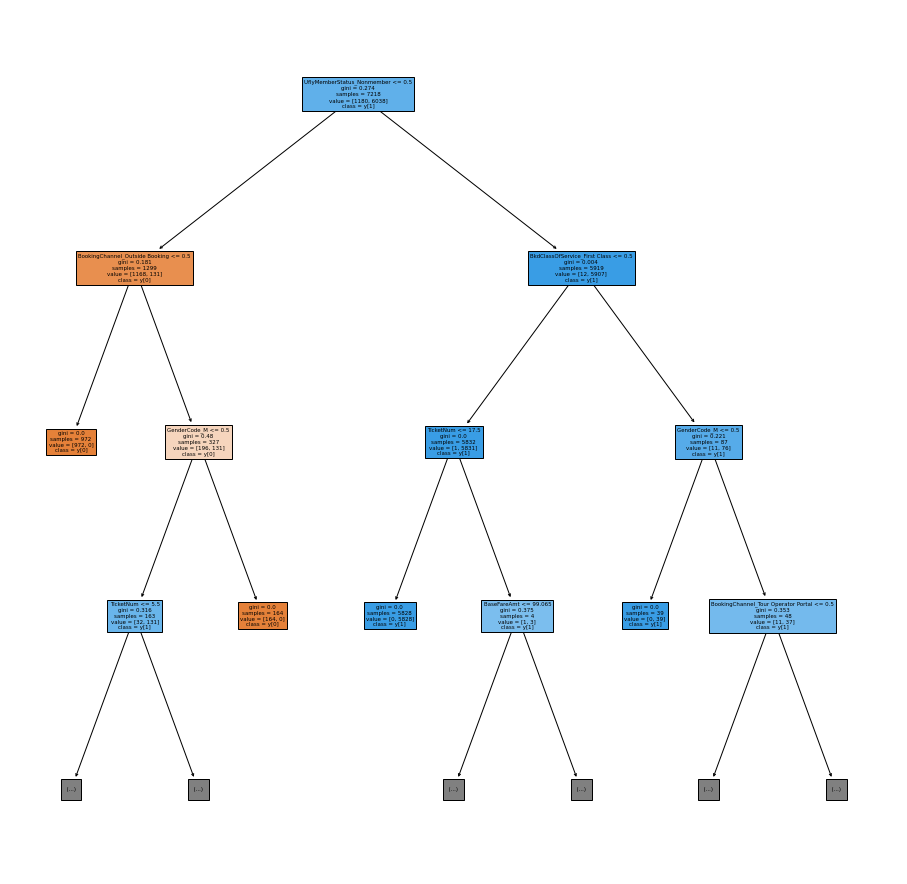

In [ ]:
plt.figure(figsize=(16,16))
plot_tree(dt, feature_names=X.columns, filled=True, class_names=True, max_depth=3)

### Decision Tree for cluster 1

In [ ]:
y = orig_df.cluster.copy()
y.loc[y == 2] = 0

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

## Cluster 1 = Non-booking outside, non-members flying coach

[Text(0.5, 0.9, 'BookingChannel_Outside Booking <= 0.5\ngini = 0.477\nsamples = 7218\nvalue = [4375, 2843]\nclass = y[0]'),
 Text(0.375, 0.7, 'UflyMemberStatus_Nonmember <= 0.5\ngini = 0.382\nsamples = 3827\nvalue = [984, 2843]\nclass = y[1]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 972\nvalue = [972, 0]\nclass = y[0]'),
 Text(0.5, 0.5, 'BkdClassOfService_First Class <= 0.5\ngini = 0.008\nsamples = 2855\nvalue = [12, 2843]\nclass = y[1]'),
 Text(0.25, 0.3, 'TicketNum <= 17.5\ngini = 0.001\nsamples = 2785\nvalue = [1, 2784]\nclass = y[1]'),
 Text(0.125, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.3, 'GenderCode_M <= 0.5\ngini = 0.265\nsamples = 70\nvalue = [11, 59]\nclass = y[1]'),
 Text(0.625, 0.1, '\n  (...)  \n'),
 Text(0.875, 0.1, '\n  (...)  \n'),
 Text(0.625, 0.7, 'gini = 0.0\nsamples = 3391\nvalue = [3391, 0]\nclass = y[0]')]

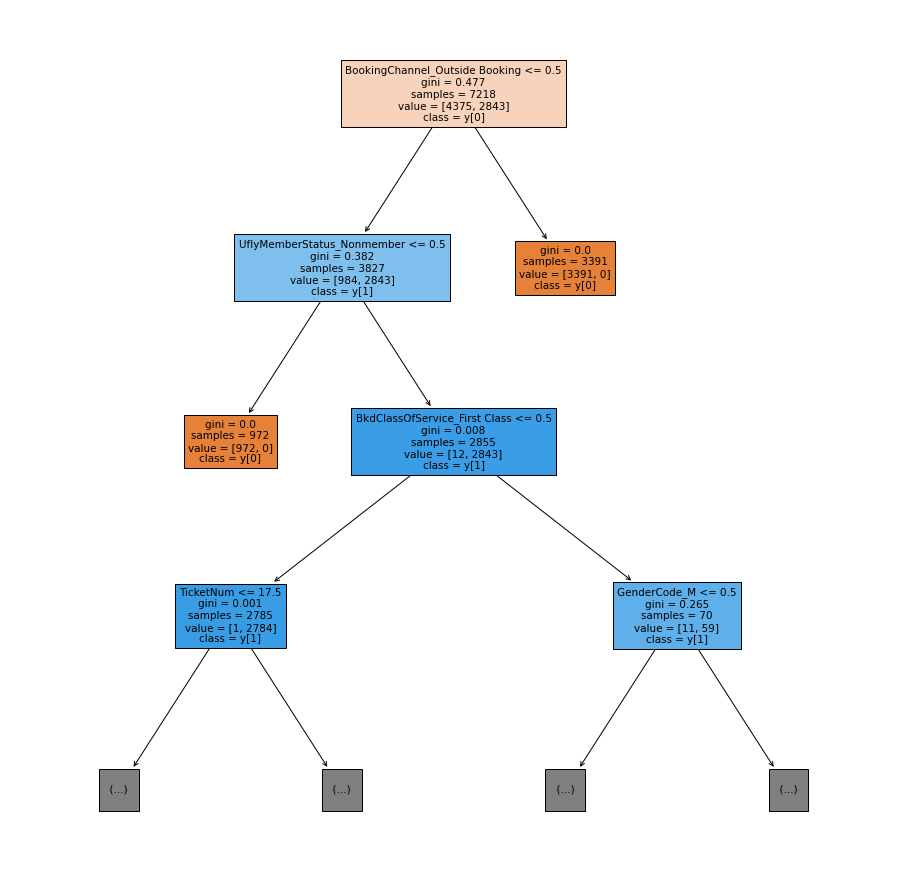

In [ ]:
plt.figure(figsize=(16,16))
plot_tree(dt, feature_names=X.columns, filled=True, class_names=True, max_depth=3)

### Decision Tree for cluster 2

In [ ]:
y = orig_df.cluster.copy()
y.loc[y == 1] = 0
y.loc[y == 2] = 1

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

## Cluster 2 = Non-members who are outside booking

[Text(0.3333333333333333, 0.9, 'BookingChannel_Outside Booking <= 0.5\ngini = 0.493\nsamples = 7218\nvalue = [4023, 3195]\nclass = y[0]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 3827\nvalue = [3827, 0]\nclass = y[0]'),
 Text(0.5, 0.7, 'UflyMemberStatus_Standard <= 0.5\ngini = 0.109\nsamples = 3391\nvalue = [196, 3195]\nclass = y[1]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 3064\nvalue = [0, 3064]\nclass = y[1]'),
 Text(0.6666666666666666, 0.5, 'GenderCode_M <= 0.5\ngini = 0.48\nsamples = 327\nvalue = [196, 131]\nclass = y[0]'),
 Text(0.5, 0.3, 'TicketNum <= 5.5\ngini = 0.316\nsamples = 163\nvalue = [32, 131]\nclass = y[1]'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.6666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 164\nvalue = [164, 0]\nclass = y[0]')]

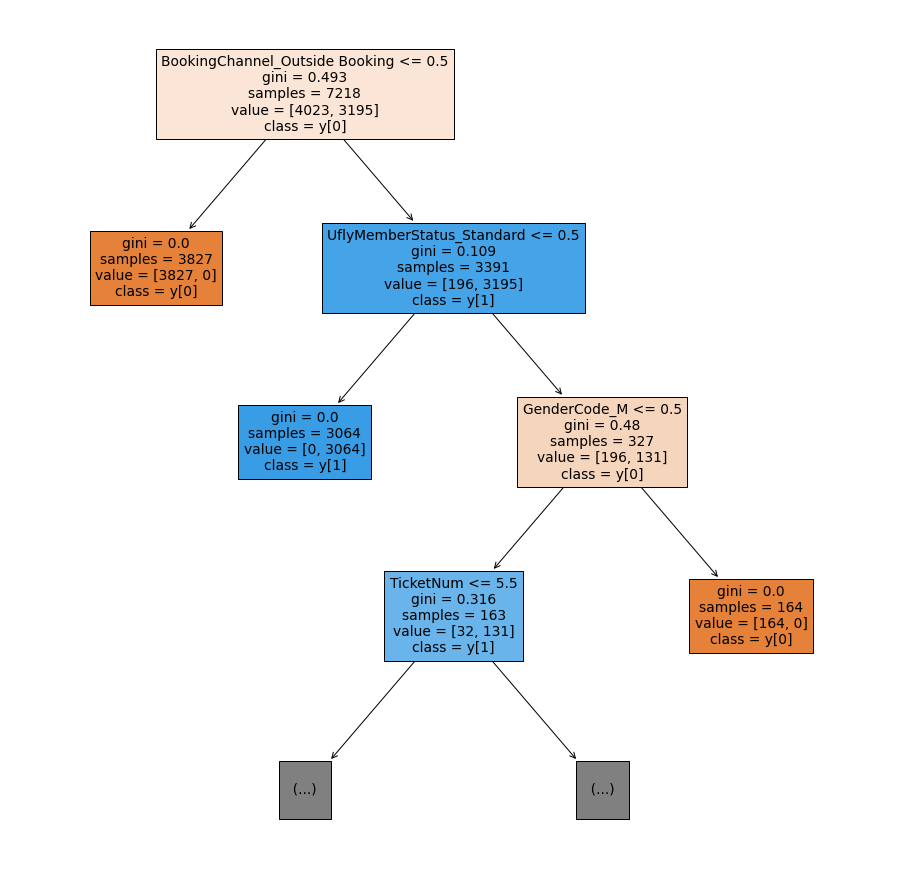

In [ ]:
plt.figure(figsize=(16,16))
plot_tree(dt, feature_names=X.columns, filled=True, class_names=True, max_depth=3)